In [81]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('Twitter_Stock_Market_Dataset.csv')

In [56]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2259,2022-10-28,NaN,NaN,NaN,NaN,NaN,NaN
2260,2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2261,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2262,2022-11-02,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.shape

(2264, 7)

In [58]:
cols=df.columns
for x in cols:
  print(x,df[x].dtype)


Date object
Open float64
High float64
Low float64
Close float64
Adj Close float64
Volume float64


In [59]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df.dropna(inplace=True)

In [61]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0


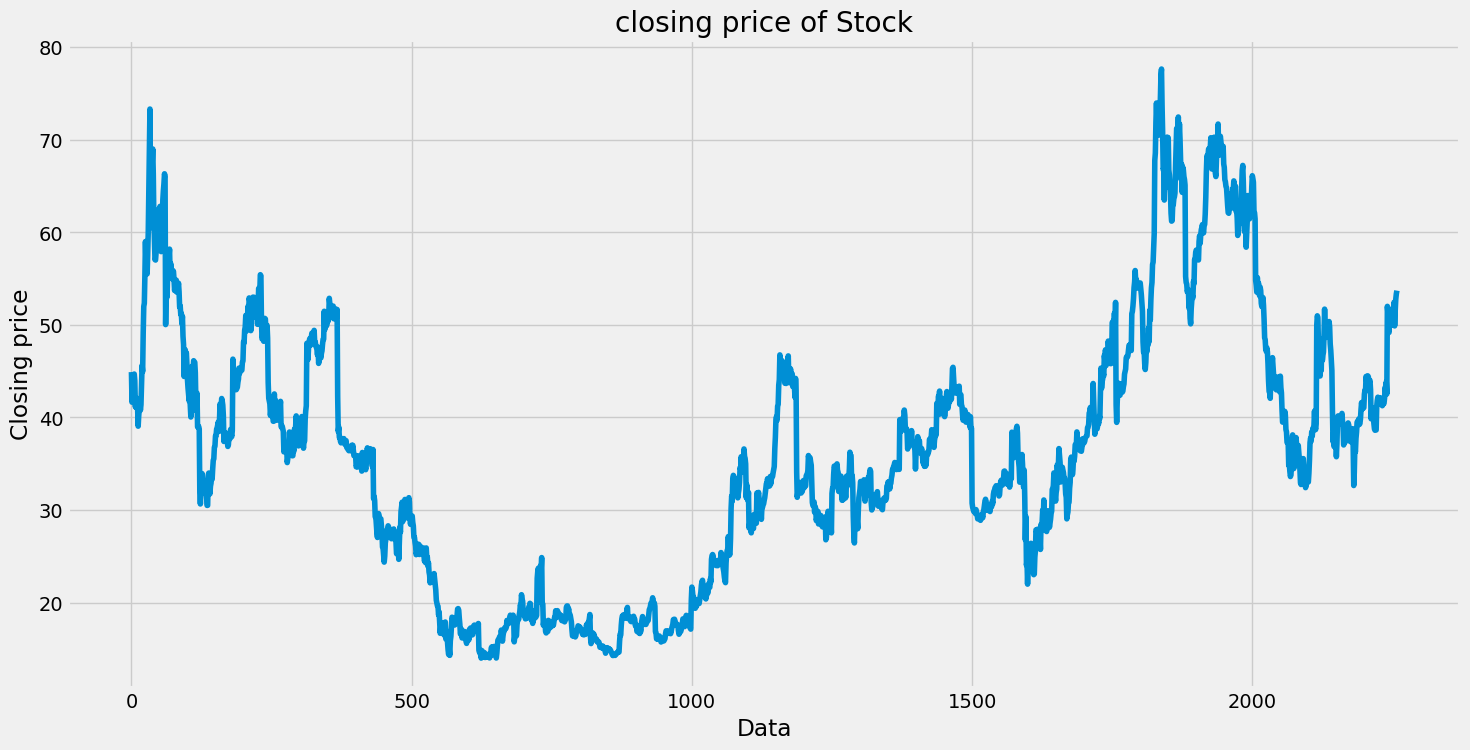

In [62]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [63]:
#creating new database with only required coloumns
data=df.filter(['Close'])
#converting the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1808

In [64]:
#scaling the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.00652357433923e-16
Standard deviation of processed data:  1.0


In [65]:
#creating the training data
#creating scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [66]:
#converting x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(1748, 60, 1)

In [67]:
#reshaping the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (1748, 60, 1)
x_train shape after reshaping (1748, 60, 1)


In [68]:
# LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [69]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
#train the model
history = model.fit(x_train,y_train,epochs=7)

Epoch 1/7
55/55 [==============================] - 13s 240ms/step - loss: 0.0096
Epoch 2/7
55/55 [==============================] - 13s 241ms/step - loss: 0.0082
Epoch 3/7
55/55 [==============================] - 14s 261ms/step - loss: 0.0078
Epoch 4/7
55/55 [==============================] - 13s 239ms/step - loss: 0.0080
Epoch 5/7
55/55 [==============================] - 13s 238ms/step - loss: 0.0074
Epoch 6/7
55/55 [==============================] - 13s 239ms/step - loss: 0.0075
Epoch 7/7
55/55 [==============================] - 13s 237ms/step - loss: 0.0078


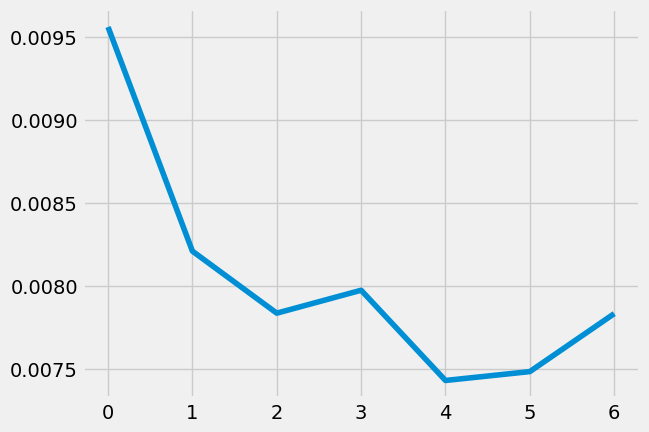

In [88]:
plt.plot(history.history['loss'])

In [73]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [74]:
#convert the data to numpy
x_test=np.array(x_test)

In [75]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [89]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

print(predictions)


15/15 [==============================] - 1s 73ms/step
[[47.373077]
 [46.232258]
 [45.477936]
 [46.01644 ]
 [47.55552 ]
 [47.2898  ]
 [47.905006]
 [47.767822]
 [49.303783]
 [48.263657]
 [50.988205]
 [50.576073]
 [52.24472 ]
 [53.669857]
 [54.307426]
 [55.990826]
 [56.438984]
 [57.66629 ]
 [59.26272 ]
 [65.97745 ]
 [67.477066]
 [70.04112 ]
 [71.9443  ]
 [70.405426]
 [70.78952 ]
 [71.09321 ]
 [69.81167 ]
 [71.95446 ]
 [71.18218 ]
 [73.15468 ]
 [75.228035]
 [75.74571 ]
 [72.5045  ]
 [69.98551 ]
 [66.54765 ]
 [66.54237 ]
 [63.713554]
 [66.64914 ]
 [64.67307 ]
 [67.157616]
 [67.03112 ]
 [68.59709 ]
 [67.870415]
 [68.538536]
 [65.81938 ]
 [65.2528  ]
 [64.524574]
 [63.755558]
 [61.85325 ]
 [60.930775]
 [60.902325]
 [62.28151 ]
 [62.402676]
 [62.800488]
 [62.935806]
 [63.258377]
 [65.5837  ]
 [67.49154 ]
 [69.44615 ]
 [69.59197 ]
 [69.34036 ]
 [70.71783 ]
 [68.77478 ]
 [70.28555 ]
 [69.25832 ]
 [67.3715  ]
 [65.38042 ]
 [66.59172 ]
 [64.22833 ]
 [66.11698 ]
 [66.04064 ]
 [65.2806  ]
 [64.85655

In [90]:
print(y_test)

[[45.790001]
 [45.18    ]
 [45.93    ]
 [47.599998]
 [47.119999]
 [48.060001]
 [47.84    ]
 [49.669998]
 [48.189999]
 [51.57    ]
 [50.529999]
 [52.66    ]
 [54.      ]
 [54.580002]
 [56.509998]
 [56.779999]
 [58.200001]
 [59.869999]
 [67.769997]
 [68.559998]
 [71.900002]
 [73.959999]
 [71.790001]
 [72.260002]
 [72.279999]
 [70.489998]
 [73.169998]
 [71.919998]
 [74.589996]
 [77.059998]
 [77.629997]
 [73.669998]
 [70.860001]
 [66.75    ]
 [66.949997]
 [63.48    ]
 [67.519997]
 [64.830002]
 [68.459999]
 [68.099998]
 [70.279999]
 [69.25    ]
 [70.199997]
 [66.720001]
 [66.230003]
 [65.209999]
 [64.269997]
 [62.060001]
 [61.200001]
 [61.259998]
 [62.939999]
 [62.990002]
 [63.630001]
 [63.830002]
 [64.239998]
 [67.      ]
 [68.989998]
 [71.220001]
 [71.190002]
 [70.860001]
 [72.449997]
 [69.739998]
 [71.709999]
 [70.120003]
 [67.940002]
 [65.699997]
 [67.330002]
 [64.309998]
 [67.019997]
 [66.720001]
 [66.010002]
 [65.699997]
 [65.089996]
 [55.220001]
 [54.580002]
 [54.400002]
 [53.560001]

In [91]:
mse=mean_squared_error(y_test,predictions)
mse

2.9582209218632856